우선 train_set,test_set 따로 파생변수를 만들고 box-cox를 하면 될 듯.

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm, skew # 수치해석 기능(확률분포) 제공
from collections import Counter
from sklearn.model_selection import train_test_split

# 아이디 살려둘려고 불러온 것
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/천체 유형 분류/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/천체 유형 분류/test.csv')

train_id = train['id']
test_id = test['id']

# 필요없는 Id 컬럼, Drop하자.
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

# 'Id'를 제거한 DataFrame의 Shape 확인
print("The train data size after dropping ID feature is : {} ".format(train.shape))
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size after dropping ID feature is : (199991, 22) 
The test data size after dropping Id feature is : (10009, 21) 


In [0]:
# # all_data 생성

# ntrain = train.shape[0] # 행 개수 반환
# ntest = test.shape[0] # 행 개수 반환
# y_train = train['type'].values # array로 type 반환
# all_data = pd.concat((train,test)).reset_index(drop=True)
# all_data.drop(['type'],axis=1,inplace=True)
# print('all_data의 크키는 : {}'.format(all_data.shape))

In [195]:
train.describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,18.000882,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,145.862346,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,-26505.602101,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,17.606148,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,18.710967,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,20.133179,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,18358.921741,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


In [196]:
test.describe()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,359.327805,20.987400,19.878440,19.280218,18.873165,18.618385,21.184506,20.091376,19.497732,19.083329,18.826624,20.715429,19.462021,18.995001,18.616519,18.411996,20.739001,19.534844,18.935095,18.522308,18.281069
std,223.928862,2.111703,2.573890,1.709344,1.720713,1.702236,1.990940,1.865064,1.710070,1.633953,1.711790,2.807434,13.971203,1.979225,1.970463,2.373022,2.187025,1.957506,1.856617,1.796820,1.867582
min,1.000000,-7.248195,-42.663871,9.134712,-22.522266,13.349827,9.390439,8.188752,12.288183,12.688984,-8.455932,-98.181975,-1348.068776,-23.908952,-8.356654,-64.917293,12.419765,13.617577,13.382832,12.955113,12.395695
25%,174.000000,19.655525,18.671025,18.037847,17.742016,17.424701,19.940430,18.892043,18.253627,17.905253,17.610776,19.249432,18.104265,17.475078,17.043615,16.805557,19.268471,18.064625,17.424393,16.971911,16.715685
50%,346.000000,20.854404,19.910333,19.444925,19.033283,18.594713,21.040735,20.071658,19.627904,19.180605,18.699819,20.371014,19.582955,19.197068,18.684269,18.171966,20.412702,19.541261,19.155839,18.635195,18.095883
75%,525.000000,22.160801,21.150040,20.489912,20.083814,19.878652,22.339213,21.402558,20.756306,20.331848,20.119736,21.803705,21.025719,20.428279,20.015701,19.815916,21.992969,20.981396,20.389215,19.970657,19.823902
max,1000.000000,37.681143,182.654452,31.883768,47.227391,34.946057,41.169991,47.160580,29.266687,31.146742,26.478564,65.392087,106.962571,41.850633,52.221528,74.747394,32.641240,28.814977,27.579664,26.471555,24.461973


psMag_u 컬럼이 train set과 test set에서 평균이 상당히 크게 나타남. train set의 이상치를 제거해 주는 것이 좋을 것 같음.

In [197]:
# 결측치 확인

for i in [train,test]:
  print(i.isnull().sum(),'\n')

type          0
fiberID       0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64 

fiberID       0
psfMag_u      0
psfMag_g      0
psfMag_r      0
psfMag_i      0
psfMag_z      0
fiberMag_u    0
fiberMag_g    0
fiberMag_r    0
fiberMag_i    0
fiberMag_z    0
petroMag_u    0
petroMag_g    0
petroMag_r    0
petroMag_i    0
petroMag_z    0
modelMag_u    0
modelMag_g    0
modelMag_r    0
modelMag_i    0
modelMag_z    0
dtype: int64 



# EDA

## psfMag

psfMag_u

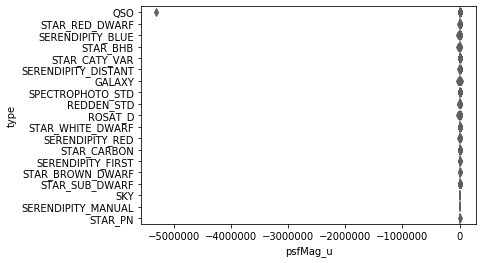

In [198]:
sns.boxplot(y="type", x="psfMag_u", data=train,palette="Set3")
plt.show()

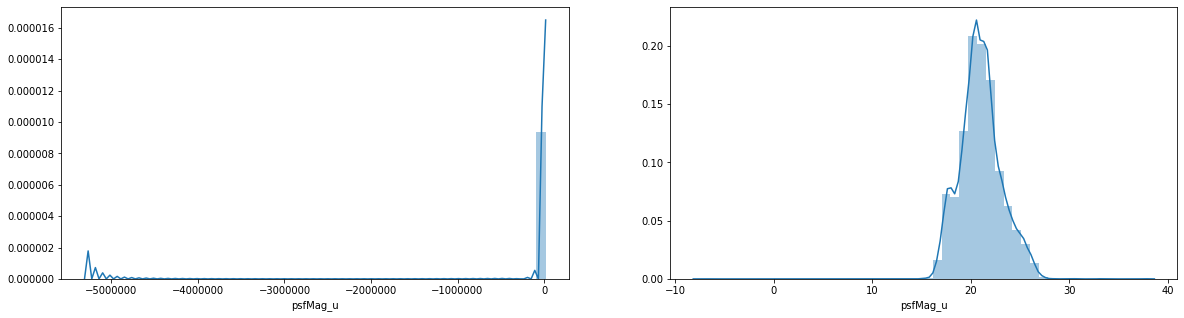

In [199]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['psfMag_u'])
plt.subplot(1,2,2)
sns.distplot(test['psfMag_u'])

 train set의 fiberMag_u의 음수 값을 확인해 봐야 할 것 같음.

In [200]:
train[train['psfMag_u'] < -100000]['psfMag_u'].value_counts()

-5.310802e+06    1
Name: psfMag_u, dtype: int64

In [0]:
train.drop(train[train['psfMag_u'] < -100000]['psfMag_u'].index,axis=0,inplace=True)

psfMag_g

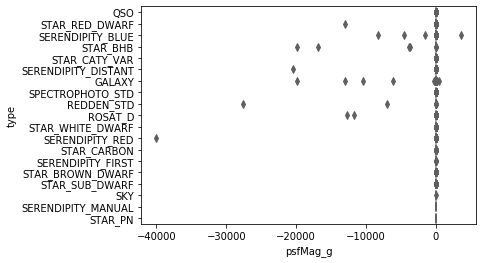

In [202]:
sns.boxplot(y="type", x="psfMag_g", data=train,palette="Set3")
plt.show()

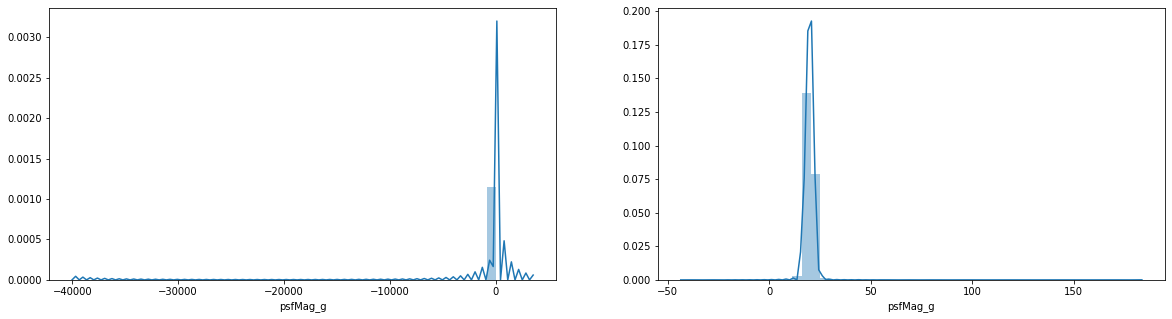

In [203]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['psfMag_g'])
plt.subplot(1,2,2)
sns.distplot(test['psfMag_g'])

In [204]:
train[train['psfMag_g']< -10000]['psfMag_g'].value_counts()

-10419.446631    1
-12794.937891    1
-19866.754771    1
-16890.113515    1
-27550.967536    1
-11676.833264    1
-12948.152840    1
-40022.466071    1
-19916.394542    1
-20413.618738    1
-13042.455876    1
Name: psfMag_g, dtype: int64

In [0]:
train.drop(train[train['psfMag_g']< -10000].index,axis=0,inplace=True)

psfMag_r

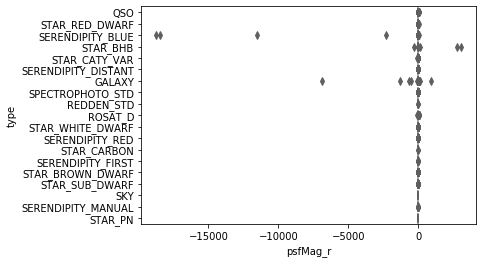

In [206]:
sns.boxplot(y="type", x="psfMag_r", data=train,palette="Set3")
plt.show()

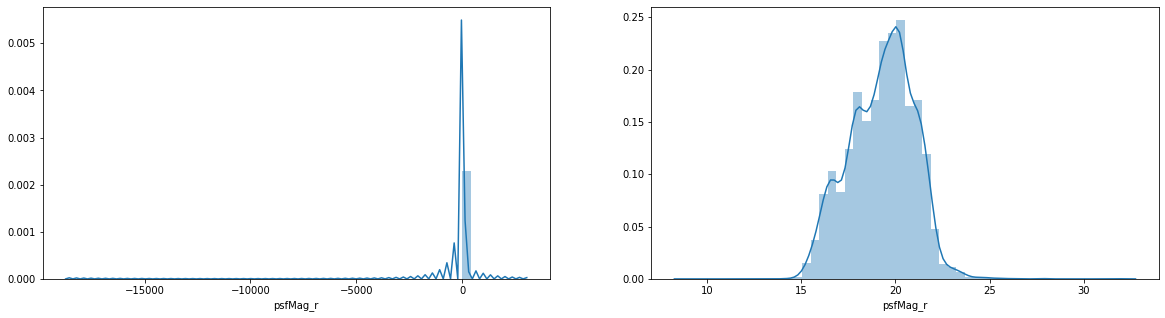

In [207]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['psfMag_r'])
plt.subplot(1,2,2)
sns.distplot(test['psfMag_r'])

In [208]:
train[train['psfMag_r']< -10000]['psfMag_r'].value_counts()

-18490.089587    1
-18726.622206    1
-11490.157429    1
Name: psfMag_r, dtype: int64

In [0]:
train.drop(train[train['psfMag_r']< -10000].index,axis=0,inplace=True)

psfMag_i

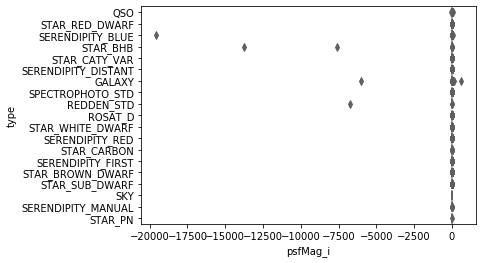

In [210]:
sns.boxplot(y="type", x="psfMag_i", data=train,palette="Set3")
plt.show()

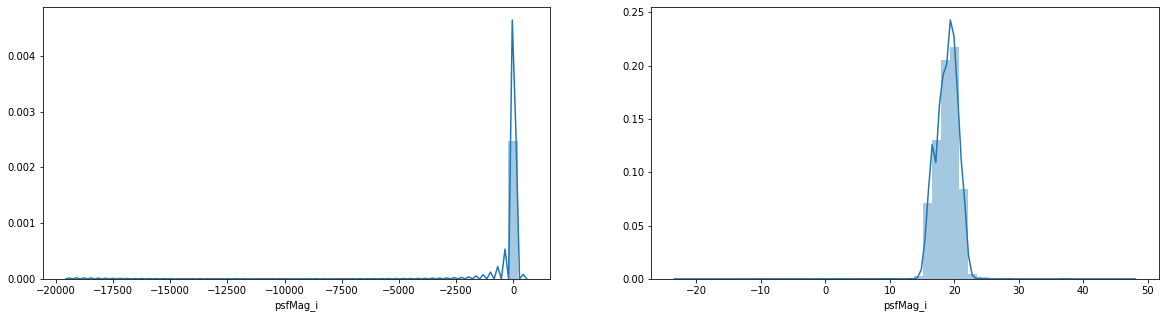

In [211]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(train['psfMag_i'])
plt.subplot(1,2,2)
sns.distplot(test['psfMag_i'])

In [212]:
train[train['psfMag_i']< -5000]['psfMag_i'].value_counts()

-19564.786109    1
-6724.599421     1
-13737.920783    1
-7593.883765     1
-6027.957170     1
Name: psfMag_i, dtype: int64

In [0]:
train.drop(train[train['psfMag_i']< -5000].index,axis=0,inplace=True)

psfMag_z

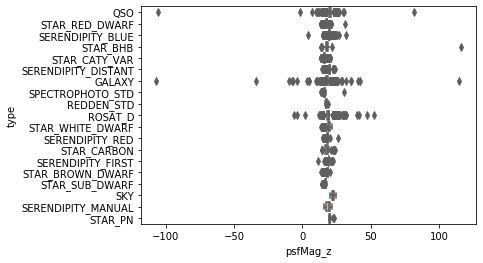

In [214]:
sns.boxplot(y="type", x="psfMag_z", data=train,palette="Set3")
plt.show()

In [0]:
train.drop(train[train['psfMag_z']< -10000].index,axis=0,inplace=True)

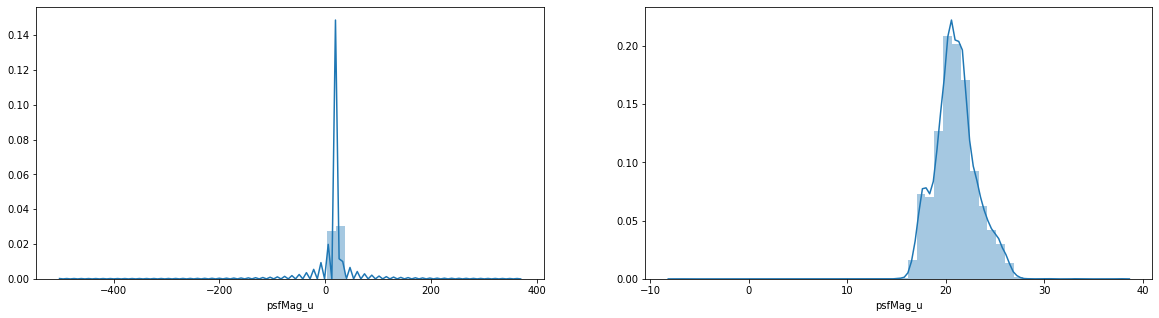

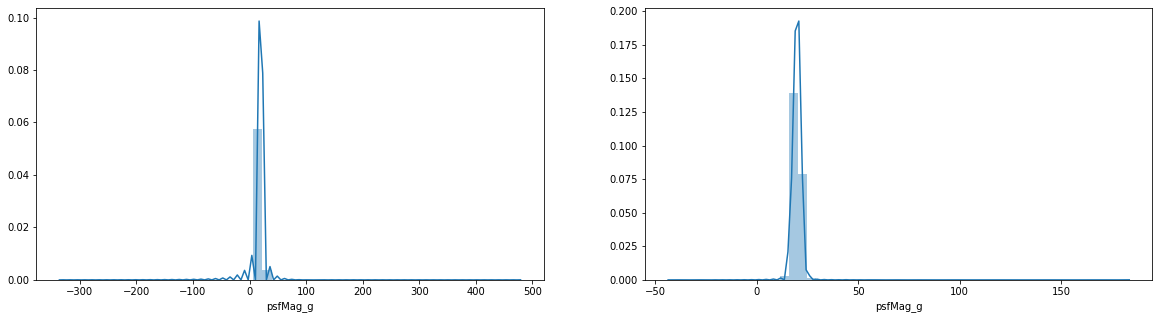

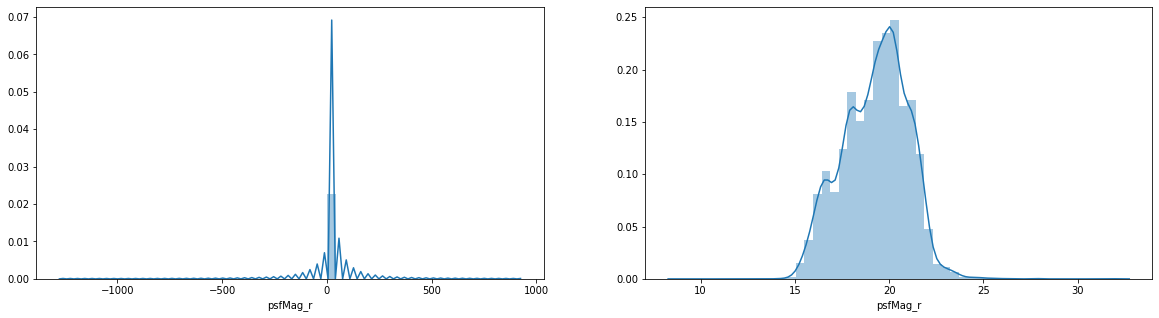

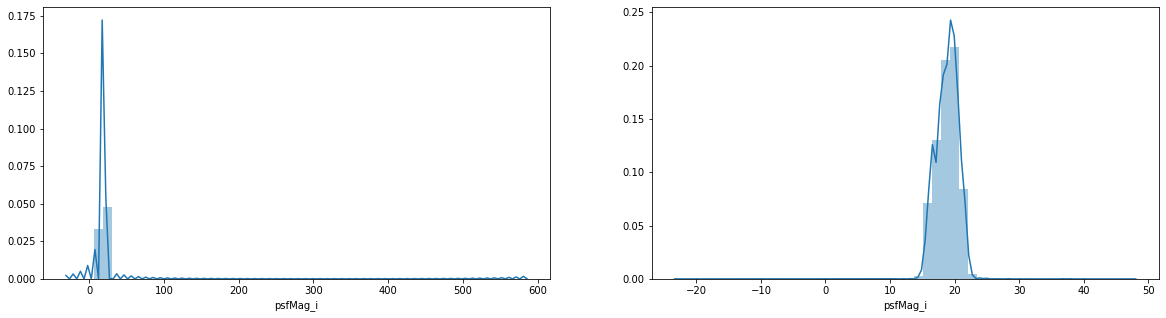

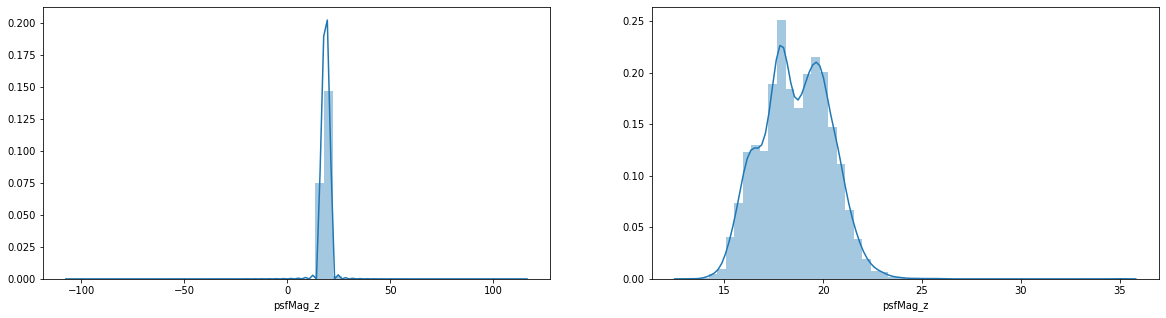

In [216]:
# 이상치를 제거한 그래프 확인

for s in ['u','g','r','i','z']:
  plt.figure(figsize=(20,5))
  plt.subplot(1,2,1)
  sns.distplot(train['psfMag_%s'%(s)])
  plt.subplot(1,2,2)
  sns.distplot(test['psfMag_%s'%(s)])

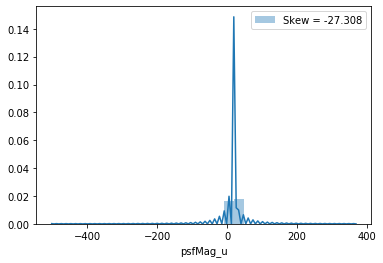

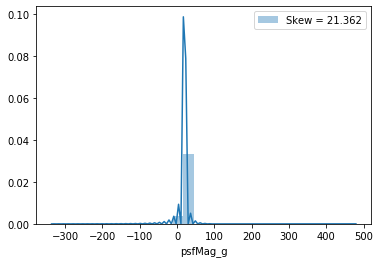

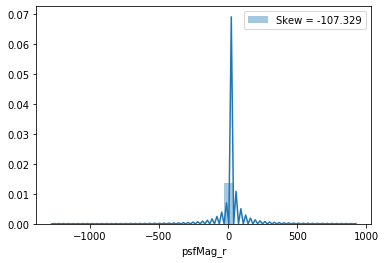

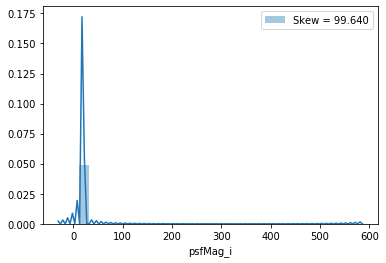

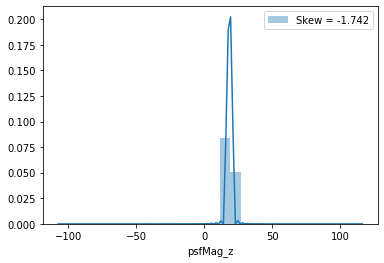

In [217]:
for feat in ['psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z']:
    skew = train[feat].skew()
    sns.distplot(train[feat], kde= True, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [218]:
train[['psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z']].describe()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z
count,199971.000000,199971.000000,199971.000000,199971.000000,199971.000000
mean,20.985019,19.863240,19.279680,18.877081,18.613098
std,2.880565,2.301695,4.428163,2.102463,1.778233
min,-501.529124,-335.608609,-1276.171892,-30.711890,-106.927107
25%,19.652851,18.701797,18.048841,17.748083,17.425874
50%,20.871582,19.904300,19.454561,19.044046,18.611941
75%,22.160488,21.150447,20.515958,20.073539,19.883921
max,368.939515,478.440761,923.580805,585.370349,115.830481


In [219]:
test[['psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z']].describe()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,20.987400,19.878440,19.280218,18.873165,18.618385
std,2.111703,2.573890,1.709344,1.720713,1.702236
min,-7.248195,-42.663871,9.134712,-22.522266,13.349827
25%,19.655525,18.671025,18.037847,17.742016,17.424701
50%,20.854404,19.910333,19.444925,19.033283,18.594713
75%,22.160801,21.150040,20.489912,20.083814,19.878652
max,37.681143,182.654452,31.883768,47.227391,34.946057


평균이 얼추 맞춰졌으니 box-cox 변환을 하자.

In [0]:
for feat in ['psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z']:
  # transform training data & save lambda value
  train[feat],fitted_lambda = stats.boxcox(train[feat]-1)
  # use lambda value to transform test data
  test[feat] = stats.boxcox(test[feat]-1, fitted_lambda)

In [0]:
from scipy.special import boxcox1p
lam = 0.15

for feat in ['psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z']:
  # transform training data & save lambda value
  train[feat] = boxcox1p(train[feat],lam)
  # use lambda value to transform test data
  test[feat] = boxcox1p(test[feat],lam)

In [222]:
train[['psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z']]

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z
0,4.085012,3.963469,3.955076,3.945226,3.944859
1,3.963426,3.911296,3.909156,3.910953,3.894049
2,3.689773,3.594750,3.590559,3.591860,3.587258
3,3.917265,3.861839,3.853303,3.847029,3.818009
4,4.290591,4.075694,3.966271,3.821210,3.733550
...,...,...,...,...,...
199986,3.905636,3.891442,3.862619,3.860383,3.855770
199987,4.219167,4.058773,3.937547,3.872852,3.828151
199988,4.112248,3.996637,3.883508,3.739048,3.646016
199989,3.944899,3.900528,3.861192,3.843227,3.823933


In [223]:
test[['psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z']]

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z
0,4.125836,4.038508,3.931144,3.743837,3.624731
1,4.058755,3.999038,3.883881,3.858845,3.822929
2,3.934262,3.800433,3.726695,3.686239,3.650512
3,3.896275,3.880205,3.873574,3.870978,3.863299
4,4.153518,4.049356,3.949727,3.804240,3.721185
...,...,...,...,...,...
10004,3.841057,3.824081,3.816165,3.809897,3.809847
10005,3.855799,3.829204,3.807425,3.812469,3.802232
10006,3.948478,3.879455,3.865619,3.853326,3.841186
10007,3.977174,3.977112,3.939246,3.946318,3.945947


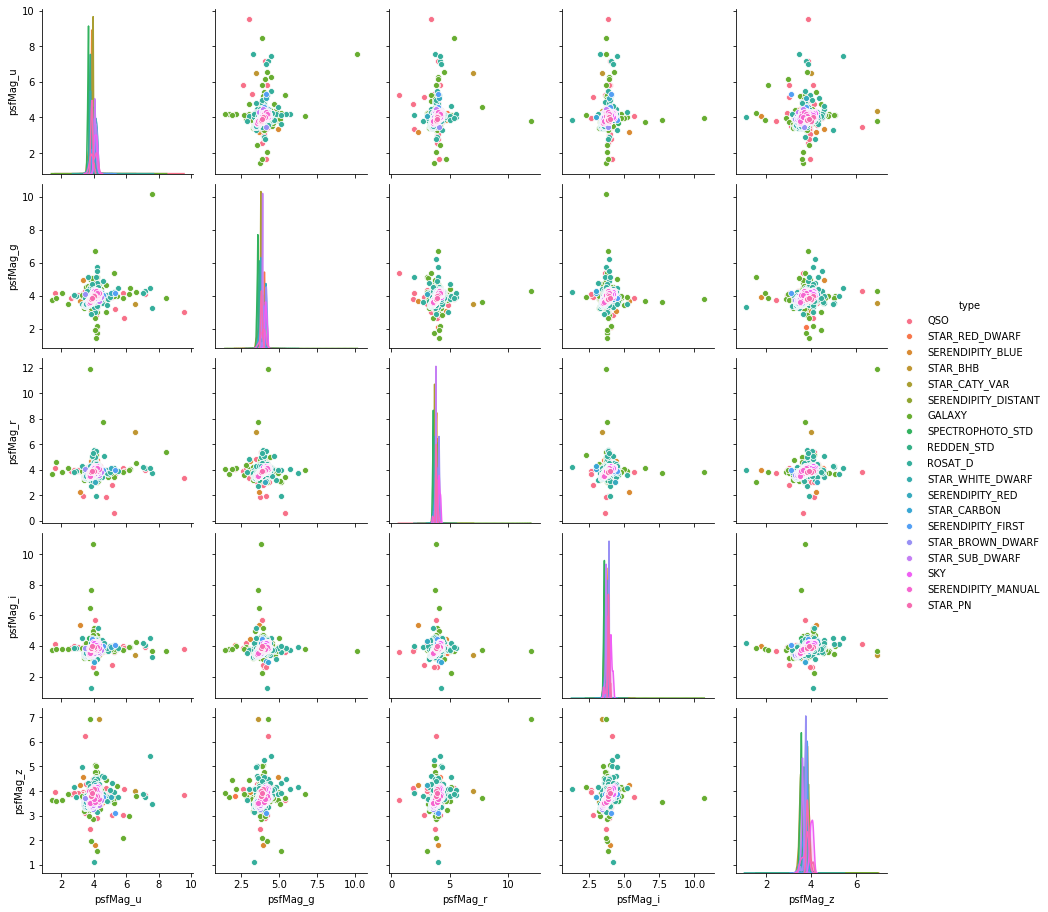

In [224]:
sns.pairplot(train[['psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z','type']],hue='type')

In [0]:
train['psfMag_u*g'] = train['psfMag_u'] *train['psfMag_g']
train['psfMag_u*r'] = train['psfMag_u'] *train['psfMag_r']
train['psfMag_u*i'] = train['psfMag_u'] *train['psfMag_i']
train['psfMag_u*z'] = train['psfMag_u'] *train['psfMag_z']

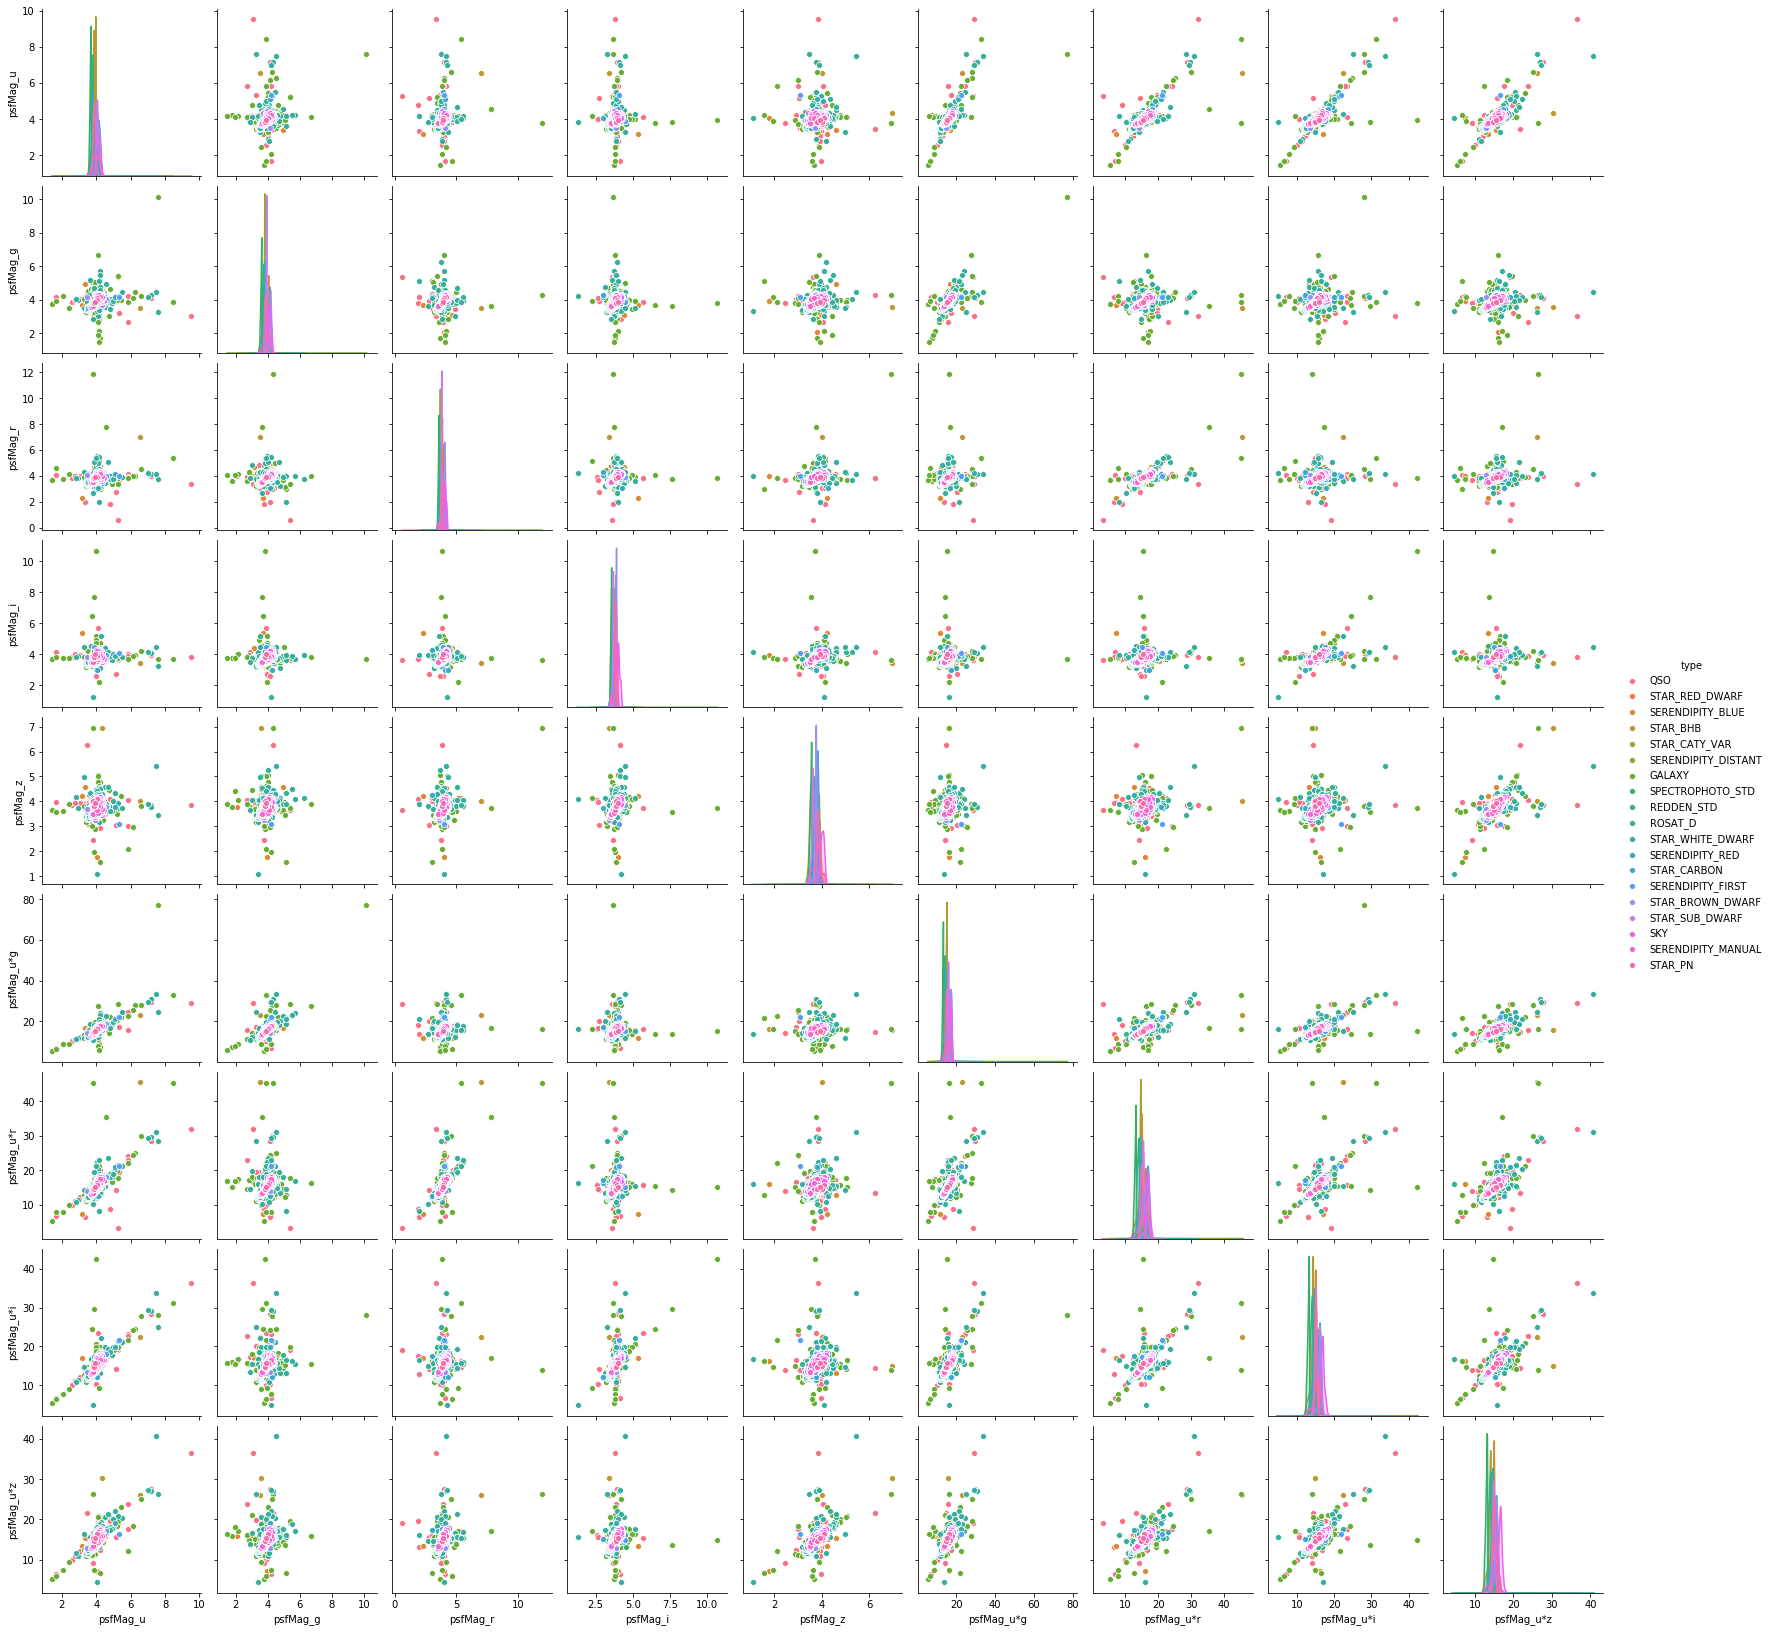

In [226]:
sns.pairplot(train[['psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                    'psfMag_u*g','psfMag_u*r','psfMag_u*i','psfMag_u*z','type']],hue='type')